https://docs.google.com/document/d/1TsKZH1M_diH4BQnnQHx5yj36yEDeQuEcY2iXihdKnrk/edit

In [1]:
#載入所需函示庫

from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 10000
import seaborn as sns

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso

## READ FILE

In [2]:
df = pd.read_csv('tracks_no_may.csv')
df = df.rename(columns = {'loadness': 'loudness'})
df.head()

,Unnamed: 0,id,name,genre,url,popularity,acousticness,danceability,energy,instrumentalness,...,duration_ms,key,loudness,mode,tempo,valence,available_market,release_date,explicit,idx
0,0,5OpjJ9qy54D3PzQJ1s4Q9X,TESTIFY,acoustic,https://open.spotify.com/track/5OpjJ9qy54D3PzQ...,59.0,0.471,0.495,0.710,0.000000,...,243800.0,0.0,-3.941,1.0,90.024,0.319,79.0,2016-07-15,0.0,0
1,1,6ZgaHk6yrHBbHrbTmKl2pZ,Learned A Lot,acoustic,https://open.spotify.com/track/6ZgaHk6yrHBbHrb...,39.0,0.850,0.556,0.285,0.068000,...,270786.0,0.0,-9.884,1.0,128.167,0.322,78.0,2011,0.0,1
2,2,4wQKyYfNDY7E8ybcp0hF61,Jupiter's Call,acoustic,https://open.spotify.com/track/4wQKyYfNDY7E8yb...,35.0,0.879,0.694,0.354,0.000083,...,180952.0,2.0,-12.275,1.0,130.346,0.652,79.0,2018-06-01,0.0,2
3,3,3JndPOkXLuhupgWnRrPSua,Rain,acoustic,https://open.spotify.com/track/3JndPOkXLuhupgW...,36.0,0.654,0.497,0.372,0.000000,...,248293.0,5.0,-8.094,1.0,94.604,0.290,56.0,2002-04-09,0.0,3
4,4,3tjQYh1H3c17IQMdd8AIBb,The Shining Barrier,acoustic,https://open.spotify.com/track/3tjQYh1H3c17IQM...,40.0,0.794,0.373,0.160,0.764000,...,251075.0,10.0,-21.342,1.0,112.578,0.144,79.0,2014-09-15,0.0,4


In [3]:
df['group'] = 0

### GROUPING

In [4]:
a = ['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'duration_ms', 'key', 'loudness', 'tempo', 'valence', 'available_market']

group = []
group.append(' ')
group.append('j-pop')
group.append('k-pop')
group.append('pop')
group.append('hip-hop')
group.append('dance')
group.append('jazz')
group.append('blues')
group.append('country')

len(group)

9

In [5]:
for i in range(df.shape[0]):
    for j in range(len(group)):
        if df['genre'][i] in group[j]:
            df['group'][i] = j
df_group = []
df_ngroup = []
for i in range(len(group) + 1):
    df_group.append(df[df['group'] == i])
    df_ngroup.append(df[df['group'] != i])

D:\STATISTIC\WPy64-3741\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
def normality_test(data):
    plt.hist(data)
    plt.show
    fig = sm.qqplot(data, stats.norm, fit=True, line='45')
    plt.show()
    stat, p = stats.shapiro(data)
    print(f'Shapiro test: statistics = {stat:.4f}, p = {p:.4f}\n')
def all_normality_test():
    

In [8]:
def f_test(data1,data2):
    df1 = data1.shape[0] - 1
    df2 = data2.shape[0] - 1
    var_ratio = stats.describe(data1).variance / stats.describe(data2).variance
    # Alternative Hypothesis: two sided
    ptmp = stats.f.cdf(var_ratio, df1, df2)
    p_value_left = ptmp
    p_value_right = 1 - ptmp
    if ptmp > 0.5:
        ptmp = 1 - ptmp
    p_value_twoside = ptmp * 2

    print("p_value (two sided) = ", p_value_twoside)
    print("p_value (right tail) = ", p_value_right)
    print("p_value (left tail) = ", p_value_left)

In [9]:
def compare_mean(attribute, index, alt = 'greater'):
    if len(index) == 1:
        print('conduct Wilcoxon rank sum test\n')
        print('Null hypothesis: the population location(distribution) of %s of %s and non-%s music are the same' % (attribute, group[index[0]], group[index[0]]))
        print('Alternative hypothesis: %s of %s music is %s than non-%s music\n' % (attribute, group[index[0]], alt, group[index[0]]))
        stat, p = stats.mannwhitneyu(df_group[index[0]][attribute],df_ngroup[index[0]][attribute],alternative = alt)
        print('statistics = %f, p = %f' % (stat, p))
    if len(index) == 2:
        print('conduct Wilcoxon rank sum test\n')
        print('Null hypothesis: the population location(distribution) of %s of %s and %s music are the same' % (attribute, group[index[0]], group[index[1]]))
        print('Alternative hypothesis: %s of %s music is %s than %s music\n' % (attribute, group[index[0]], alt, group[index[1]]))
        stat, p = stats.mannwhitneyu(df_group[index[0]][attribute],df_group[index[1]][attribute],alternative = alt)
        print('statistics = %f, p = %f' % (stat, p))
    if len(index) >= 2:
        print('conduct Tukey\'s miltiple comparison\n')
        Group = []
        for i in range(len(index)):
            Group.append(group[index[i]])
        df1 = df[df['genre'].isin(Group)]
        mc = smm.MultiComparison(df1[attribute],df1['genre'])
        _ = mc.tukeyhsd().plot_simultaneous()
        plt.show()

In [10]:
def compare_attribute(index, I = 0, alt = 'greater'):
    print('conduct Wilcoxon rank sum test')
    if len(index) == 1:
        print('comparing %s and non-%s:\n' % (group[index[0]], group[index[0]]))
        for i in range(len(a)):
            stat, p = stats.mannwhitneyu(df_group[index[0]][a[i]],df_ngroup[index[0]][a[i]],alternative = alt)
            print(a[i],':\n')
            if(I or p > 0.95 or p < 0.05):
                print('Null hypothesis: the population location(distribution) of %s of %s and non-%s music are the same' % (a[i], group[index[0]], group[index[0]]))
                print('Alternative hypothesis: %s of %s music is %s than non-%s music\n' % (a[i], group[index[0]], alt, group[index[0]]))
                print('statistics = %f, p = %f\n\n' % (stat, p))
    if len(index) == 2:
        print('compareing %s and %s:\n' % (group[index[0]], group[index[1]]))
        for i in range(len(a)):
            stat, p = stats.mannwhitneyu(df_group[index[0]][a[i]],df_group[index[1]][a[i]],alternative = alt)
            print(a[i],':\n')
            if(I or p > 0.95 or p < 0.05):    
                print('Null hypothesis: the population location(distribution) of %s of %s and %s music are the same' % (a[i], group[index[0]], group[index[1]]))
                print('Alternative hypothesis: %s of %s music is %s than %s music\n' % (a[i], group[index[0]], alt, group[index[1]]))
                print('statistics = %f, p = %f\n\n' % (stat, p))

In [11]:
def index(genre):
    for i in range(len(group)):
        if group[i] == genre:
            return i

In [12]:
def compare(index):
    for i in range(len(a)):
        print(a[i],':\n')
        compare_mean(a[i], index)

popularity :

conduct Tukey's miltiple comparison



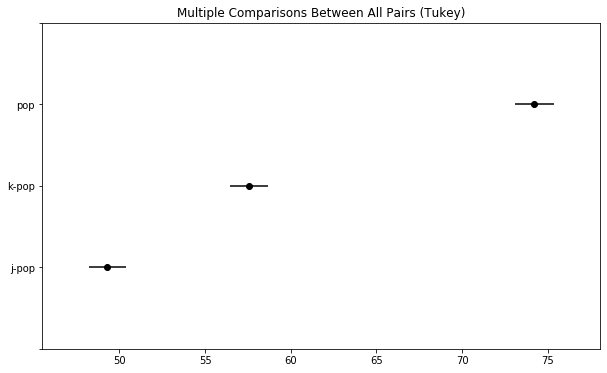

acousticness :

conduct Tukey's miltiple comparison



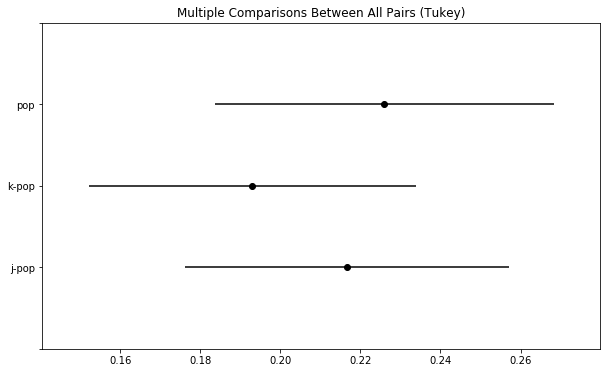

danceability :

conduct Tukey's miltiple comparison



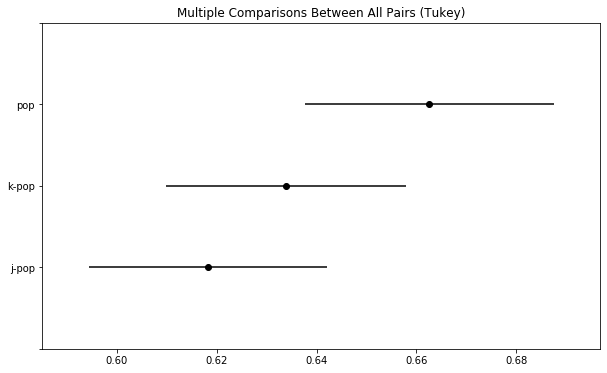

energy :

conduct Tukey's miltiple comparison



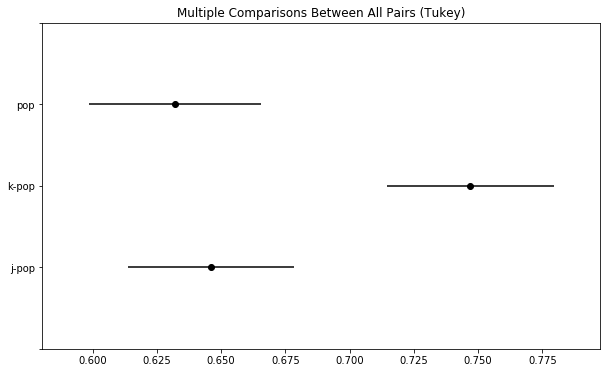

instrumentalness :

conduct Tukey's miltiple comparison



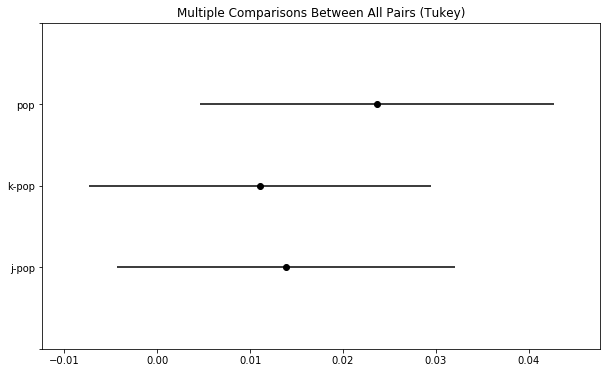

liveness :

conduct Tukey's miltiple comparison



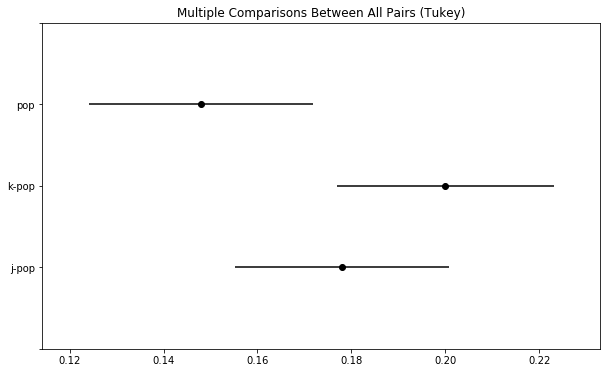

speechiness :

conduct Tukey's miltiple comparison



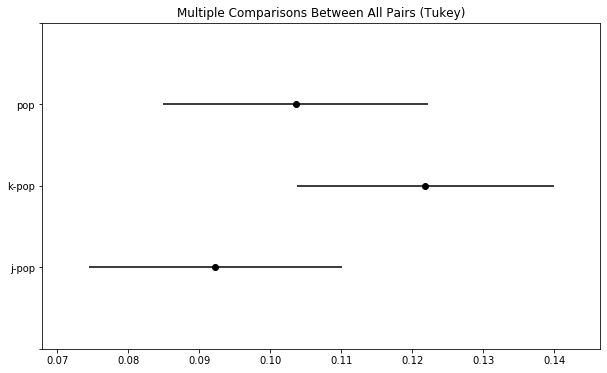

duration_ms :

conduct Tukey's miltiple comparison



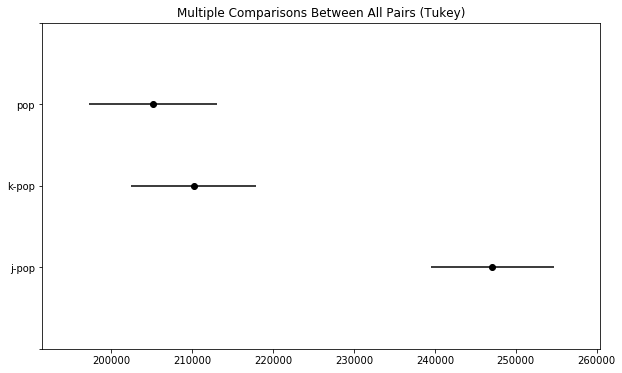

key :

conduct Tukey's miltiple comparison



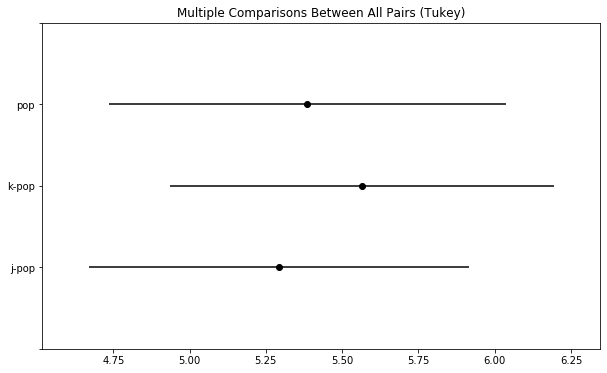

loudness :

conduct Tukey's miltiple comparison



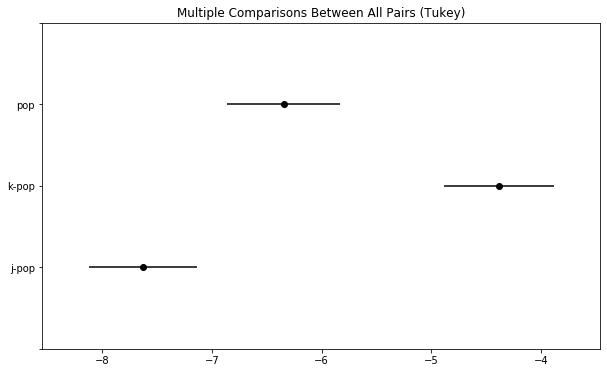

tempo :

conduct Tukey's miltiple comparison



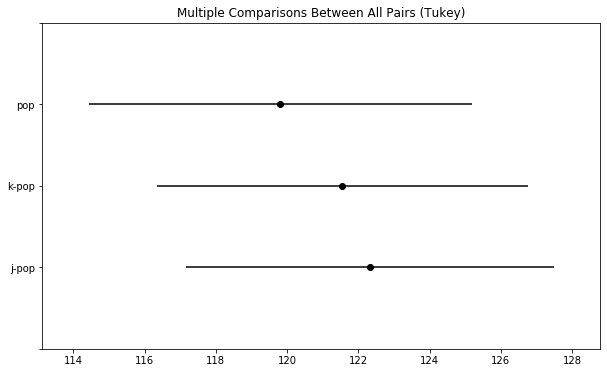

valence :

conduct Tukey's miltiple comparison



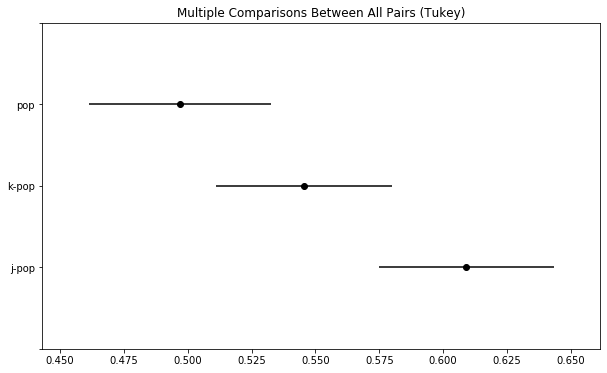

available_market :

conduct Tukey's miltiple comparison



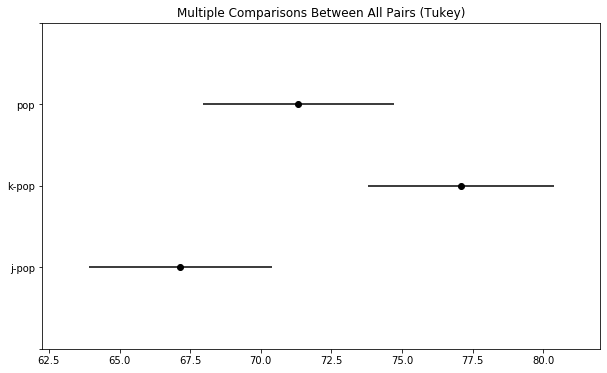

In [13]:
compare([index('j-pop'),index('k-pop'),index('pop')])